In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew, probplot
from scipy.special import boxcox1p
df = pd.read_csv("kc_house_data.csv")
columns_to_drop = ["zipcode", "lat", "long"]
df = df.drop(columns=columns_to_drop)

In [2]:
#count the number of categorical variables
cat_count = 0
for dtype in df.dtypes:
    if dtype == 'object':
        cat_count = cat_count + 1

print('# of categorical variables:',cat_count)
print('# of contineous variables:',df.shape[1] - cat_count - 1) #subt

# of categorical variables: 1
# of contineous variables: 16


In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [4]:
print(df.columns)
df.shape

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


(21613, 18)

In [5]:
# Target variable
y = df['price']
# Define the predictor variables
X = df.drop(columns=['id', 'date', 'price'])
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Add a constant term to the predictor variables
X_train = sm.add_constant(X_train)

# Build and fit the multiple linear regression model
model = sm.OLS(y_train, X_train).fit()

# Make predictions on the training data
y_pred = model.predict(X_train)

# Calculate the mean squared error
mse = ((y_train - y_pred) ** 2).mean()

# Calculate the root mean squared error
rmse = mse ** 0.5

# R-squared
r_squared = model.rsquared

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Mean Squared Error: 45279317795.07959
Root Mean Squared Error: 212789.37425322627
R-squared: 0.6534267261273159


In [7]:
# Multiple linear regerssion model Summary
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     2326.
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:04:40   Log-Likelihood:            -2.3665e+05
No. Observations:               17290   AIC:                         4.733e+05
Df Residuals:                   17275   BIC:                         4.734e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.308e+06   1.53e+05     41.366

In [8]:
from sklearn.preprocessing import LabelEncoder

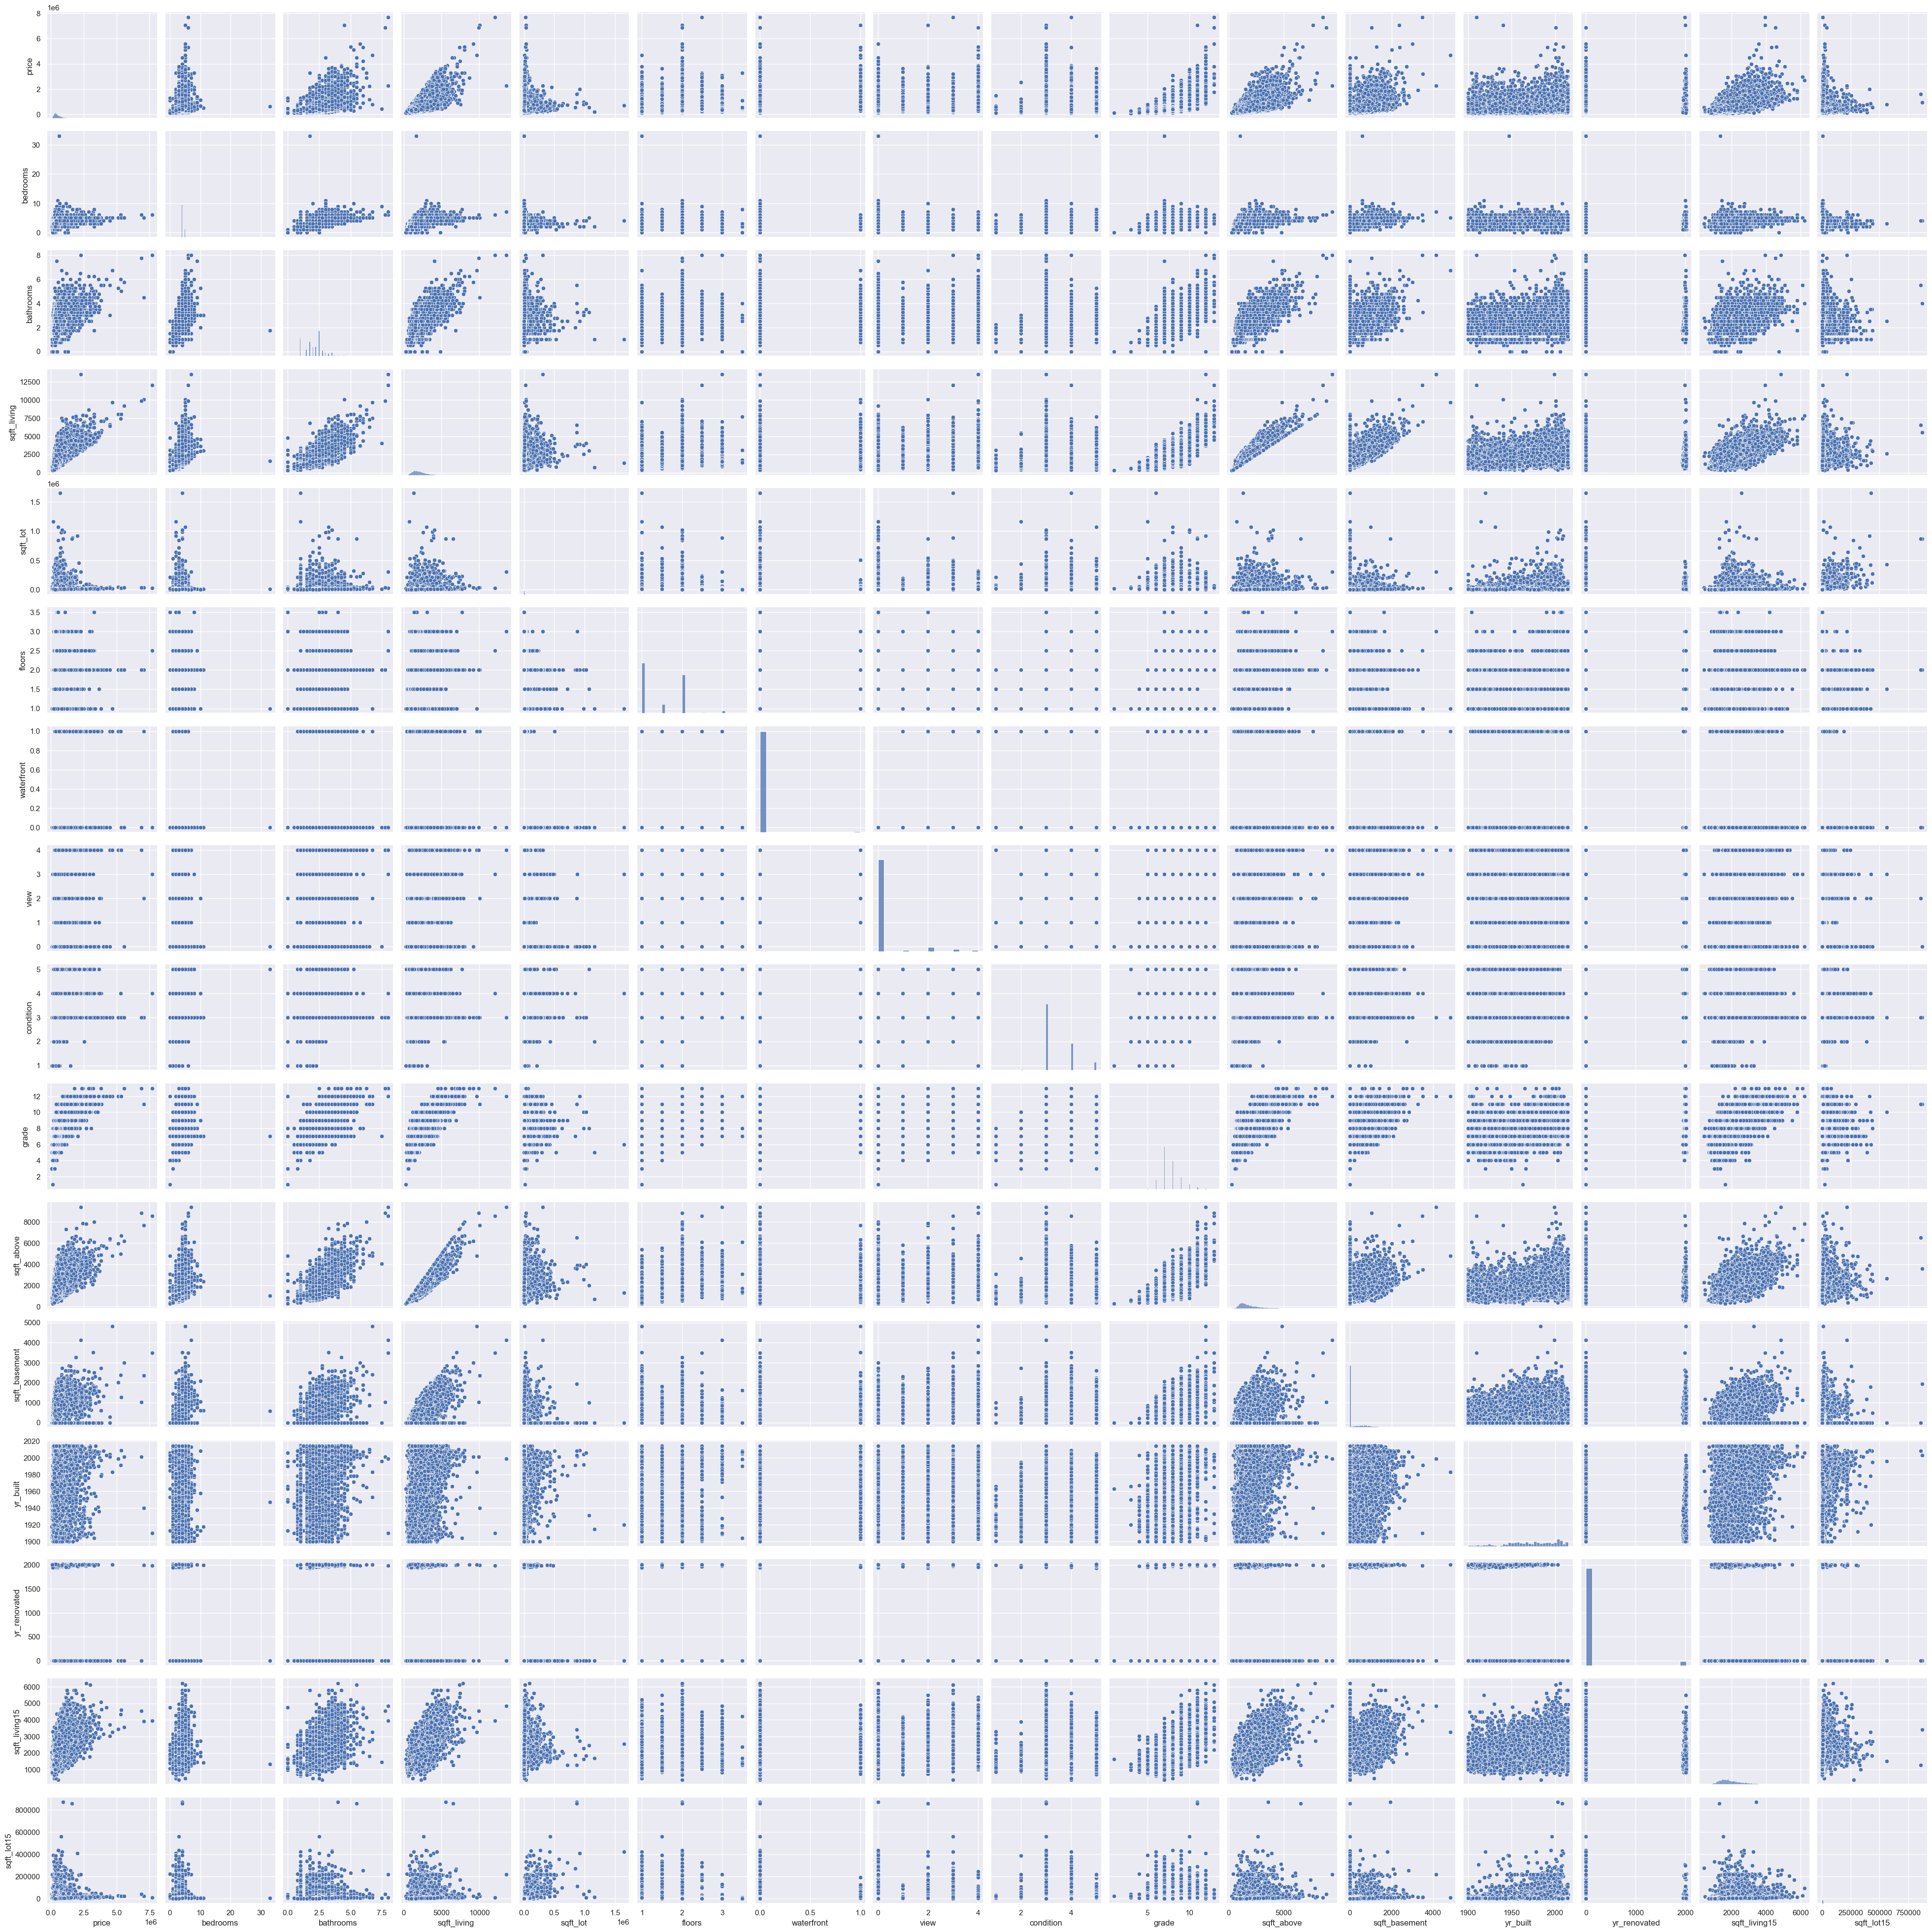

In [9]:
#scatterplot
sns.set()
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']
sns.pairplot(df[cols], height = 2.5)
plt.show()

C:\Users\imryz\AppData\Local\Temp\ipykernel_13360\2211565192.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<Axes: >

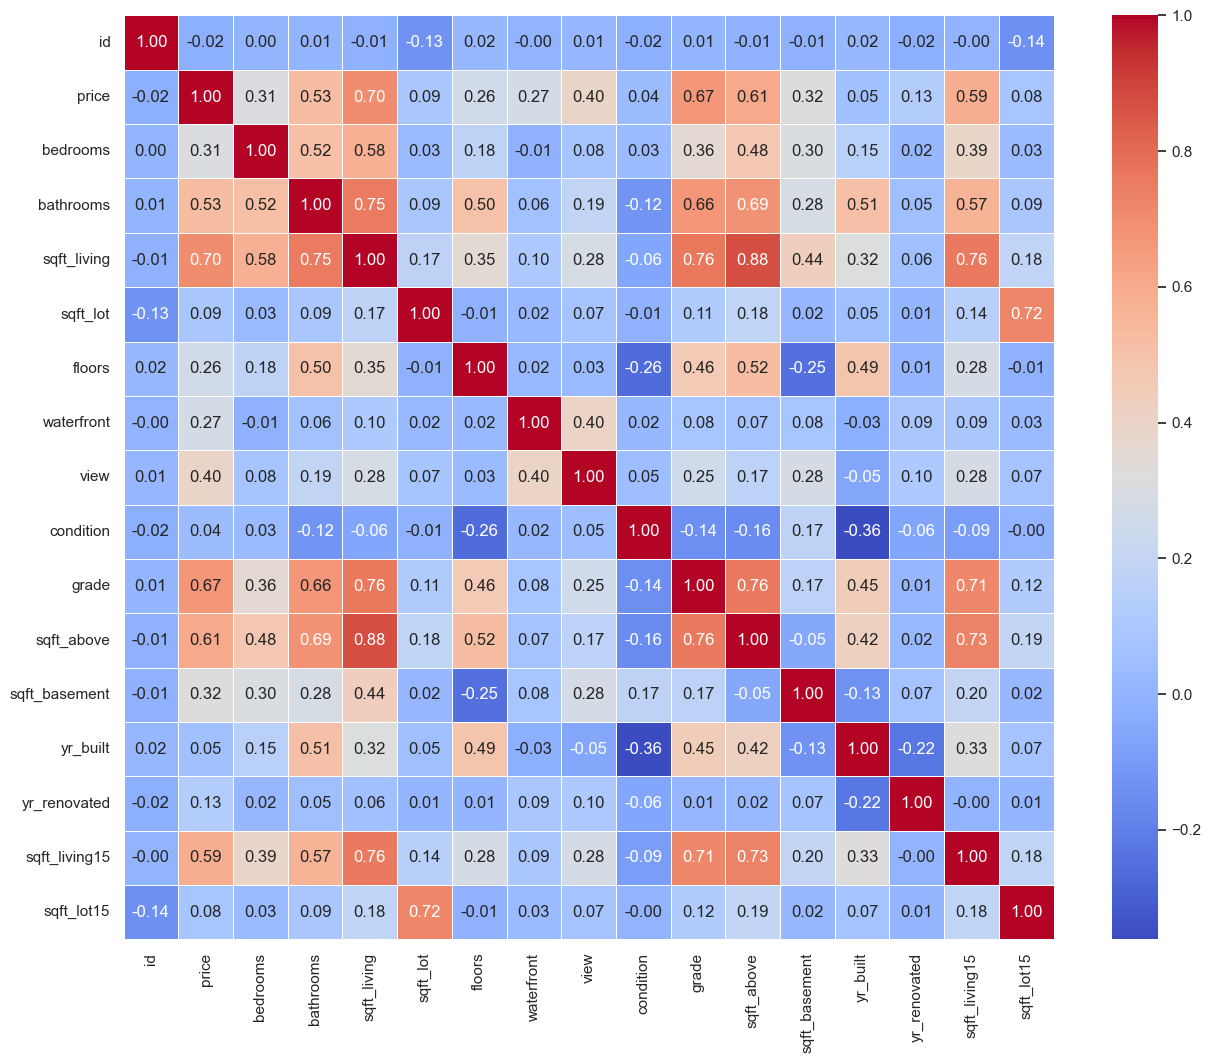

In [11]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df.corr()
f, ax = plt.subplots(figsize=(15, 12))
#sns.heatmap(corrmat, vmax=.8, square=True)
sns.heatmap(corrmat, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", ax=ax)